In [45]:
import pandas as pd
import plotly.graph_objs as go

In [46]:
# read in the data
df = pd.read_csv('../assets/US_Accidents_Dec21_updated.csv')
df.shape

(2845342, 47)

In [47]:
# each row is an accident
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
# missing data?
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [5]:
# make a list of columns
list_of_columns=list(df.columns)
list_of_columns

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [6]:
# data objects
go.Bar
go.Scatter
go.Pie
go.Choropleth

# figure objects
go.Figure


plotly.graph_objs._figure.Figure

In [7]:
# unique state values
df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [20]:
def getYear(startTime):
    return startTime[0:4]

# add year column
df['Year'] = df['Start_Time'].apply(getYear)
df.Year.unique()

array(['2016', '2017', '2021', '2020', '2018', '2019'], dtype=object)

In [24]:
# getting total count of accidents by year and state
dfByState = df.groupby(['Year', 'State']).size().reset_index(name='Counts')
dfByState

,Year,State,Counts
0,2016,AL,133
1,2016,AR,26
2,2016,AZ,2715
3,2016,CA,33592
4,2016,CO,1286
...,...,...,...
288,2021,VT,16
289,2021,WA,10875
290,2021,WI,187
291,2021,WV,4776


In [35]:
# getting top 20 cities with accidents
dfByCity = df.groupby(['City']).size().sort_values(ascending=False).reset_index(name='Counts')
dfByCity.head(20)

,City,Counts
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
5,Charlotte,33152
6,Sacramento,32559
7,San Diego,26627
8,Raleigh,22840
9,Minneapolis,22768


In [39]:
# getting distinct weather conditions
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [42]:
# getting top 15 weather conditions causing accidents
dfByWeather = df.groupby(['Weather_Condition']).size().sort_values(ascending=False).reset_index(name='Counts')
dfByWeather.head(10)

,Weather_Condition,Counts
0,Fair,1107194
1,Mostly Cloudy,363959
2,Cloudy,348767
3,Partly Cloudy,249939
4,Clear,173823
5,Light Rain,128403
6,Overcast,84882
7,Scattered Clouds,45132
8,Light Snow,43752
9,Fog,41226


In [43]:
# getting counts by severity
dfBySeverity = df.groupby(['Severity']).size().sort_values(ascending=False).reset_index(name='Counts')
dfBySeverity

,Severity,Counts
0,2,2532991
1,3,155105
2,4,131193
3,1,26053


In [26]:
# generating choroplet data

data=go.Choropleth(
    locations=dfByState['State'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = dfByState[dfByState['Year'] == '2016']['Counts'], # Data to be color-coded
    colorscale = ['lightgrey','blue'],
    colorbar_title = 'some title',
)
data

Choropleth({
    'colorbar': {'title': {'text': 'some title'}},
    'colorscale': [[0.0, 'lightgrey'], [1.0, 'blue']],
    'locationmode': 'USA-states',
    'locations': array(['AL', 'AR', 'AZ', ..., 'WI', 'WV', 'WY'], dtype=object),
    'z': array([  133,    26,  2715, 33592,  1286,  1998,   144,   204,  8783,  2872,
                  735,   418,  6677,  1553,   760,  1044,   798,   820,  1988,   132,
                 2975,  2517,  2756,   393,    59,  4276,     3,   367,   250,  3961,
                  151,  1239,  6823,  3801,   519,   921,  3404,   635,   998,     6,
                 1618,  9288,   941,  2611,    17,  2861,  1489,   398,    69])
})

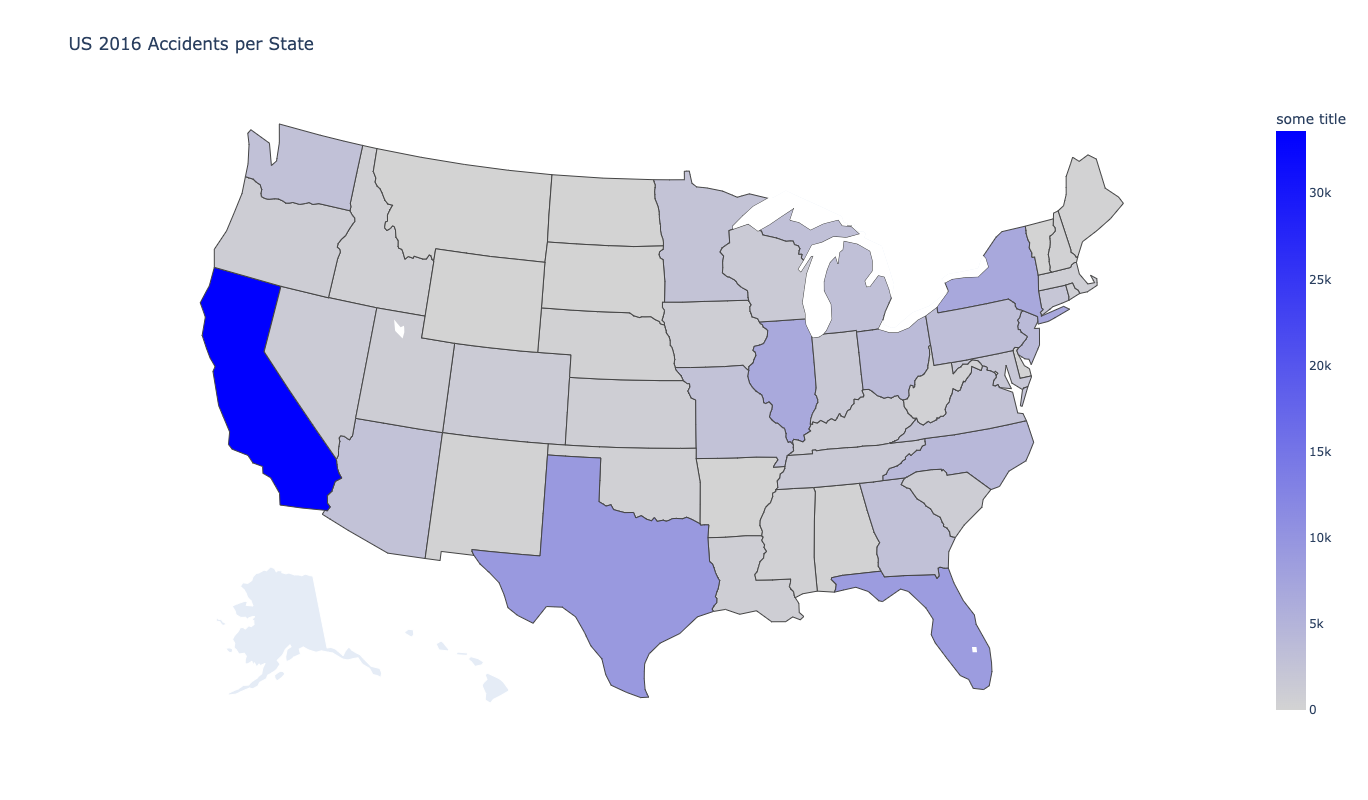

In [44]:
fig = go.Figure([data])
fig.update_layout(
        title_text = 'US 2016 Accidents per State',
        geo_scope='usa',
        width=1200,
        height=800
    )
fig.write_html('2016-accidents.html')
fig